In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [0]:
# from collections import Counter
# print(sorted(Counter(train['type_num']).items()))
# type0 = train[train['type_num']==1]
# type1 = train[train['type_num']==4]
# type2 = train[train['type_num']==5]
# type3 = train[train['type_num']==6]
# type4 = train[train['type_num']==8]
# type5 = train[train['type_num']==10]
# type6 = train[train['type_num']==11]
# type7 = train[train['type_num']==13]
# type8 = train[train['type_num']==15]
# type9 = train[train['type_num']==18]
# type10 = train[train['type_num']==0]
# type11 = train[train['type_num']==2]
# type12 = train[train['type_num']==3]
# type13 = train[train['type_num']==7]
# type14 = train[train['type_num']==9]
# type15 = train[train['type_num']==12]
# type16 = train[train['type_num']==14]
# type17 = train[train['type_num']==16]
# type18 = train[train['type_num']==17]
# unsam_train0 = type0.sample(5000)
# unsam_train1 = type1.sample(5000)
# unsam_train2 = type2.sample(5000)
# unsam_train3 = type3.sample(5000)
# unsam_train4 = type4.sample(5000)
# unsam_train5 = type5.sample(5000)
# unsam_train6 = type6.sample(5000)
# unsam_train7 = type7.sample(5000)
# unsam_train8 = type8.sample(5000)
# unsam_train9 = type9.sample(5000)
# type10, type
# unsam_train = pd.concat([unsam_train0, unsam_train1, unsam_train2, unsam_train3, unsam_train4, unsam_train5, unsam_train6, unsam_train7, unsam_train8, unsam_train9, type10, type11, type12, type13, type14, type15, type16, type17, type18],axis=0)
# print(sorted(Counter(unsam_train['type_num']).items()))


train 에서 type column 을 없애고 test 랑 합쳐서 .

IQR 방법으로 Outlier 제거.
일단 주석처리.

In [0]:
y_train = train['type_num']
train_wo_type = train.drop(columns=['type','type_num','fiberID'], axis=1)
test = test.drop(columns=['fiberID'])
total = pd.concat([train_wo_type, test])
#total.info()
#print(unsam_train.info())

In [0]:
# from collections import Counter
# def detect_outliers(df, n, features): 
#   outlier_indices = [] 
#   for col in features:
#     if col == 'type' or col == 'id':
#       continue; 
#     Q1 = np.percentile(df[col], 25) 
#     Q3 = np.percentile(df[col], 75) 
#     IQR = Q3 - Q1 

#     outlier_step =  IQR 
#     outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
#     outlier_indices.extend(outlier_list_col) 

#   outlier_indices = Counter(outlier_indices) 
#   multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
#   print()
#   return multiple_outliers 

# features = total.columns
# print(features)
# dup = detect_outliers(total, 2, features)

# print(len(dup))

# filter(lambda a: a < 199991, dup)
# print(len(dup))

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import minmax_scale
#Scaler = StandardScaler()
#Scaler = MinMaxScaler()
Scaler = RobustScaler()

total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']] = Scaler.fit_transform(total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']])
total.describe()
#X_train = total.iloc[:64488]
#test = total.iloc[64488:]
X_train = total.iloc[:199991]
test = total.iloc[199991:]
print(X_train.describe())
print(y_train.describe())


                 id      psfMag_u  ...     modelMag_i     modelMag_z
count  199991.00000  1.999910e+05  ...  199991.000000  199991.000000
mean    99995.00000 -1.101418e+01  ...      -0.317283      -0.292707
std     57732.57318  4.736054e+03  ...      43.853669      42.936817
min         0.00000 -2.117774e+06  ...  -13033.426412   -8372.746487
25%     49997.50000 -4.856811e-01  ...      -0.556210      -0.447999
50%     99995.00000  3.220121e-04  ...       0.000081       0.000117
75%    149992.50000  5.143601e-01  ...       0.443718       0.552081
max    199990.00000  7.478071e+03  ...    1351.832486    2377.503900

[8 rows x 21 columns]
count    199991.000000
mean          8.877339
std           4.624156
min           0.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          18.000000
Name: type_num, dtype: float64


In [7]:
test.describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,204995.000000,0.046595,-0.010552,-0.070441,-0.073170,0.003111,0.056686,0.008941,-0.053144,-0.043297,0.046032,0.136652,-0.042985,-0.063319,-0.025788,0.079129,0.121671,-0.004399,-0.069974,-0.039849,0.057952
std,2889.493756,0.842075,1.050305,0.693016,0.739520,0.692529,0.830497,0.750816,0.680249,0.673035,0.677605,1.101012,4.831036,0.664959,0.663688,0.790188,0.802099,0.677846,0.622257,0.600664,0.599828
min,199991.000000,-11.212789,-25.531652,-4.183713,-17.863895,-2.140323,-4.863068,-4.782681,-2.921033,-2.677166,-10.753661,-46.492203,-472.914949,-14.477725,-9.110849,-27.668522,-2.929437,-2.053433,-1.930852,-1.900922,-1.832304
25%,202493.000000,-0.484511,-0.503251,-0.574132,-0.559310,-0.482521,-0.462266,-0.473873,-0.548037,-0.528554,-0.435257,-0.438278,-0.512477,-0.573966,-0.555571,-0.455796,-0.417651,-0.513507,-0.576296,-0.558136,-0.444816
50%,204995.000000,-0.006439,0.002463,-0.003663,-0.004355,-0.006520,-0.003286,0.001003,-0.001363,-0.003229,-0.004163,0.001580,-0.001168,0.004570,-0.002969,-0.000799,0.002000,-0.002177,0.004009,-0.002112,-0.001525
75%,207497.000000,0.514507,0.508339,0.420003,0.447136,0.515832,0.538358,0.536781,0.447505,0.470975,0.557905,0.563449,0.497718,0.418218,0.445482,0.546617,0.581568,0.496514,0.417383,0.444323,0.553477
max,209999.000000,6.703486,66.412049,5.039392,12.112770,6.645779,8.393391,10.906150,3.832852,4.925694,3.075022,17.657821,30.213413,7.615469,11.292996,18.838138,4.486858,3.209131,2.827309,2.617526,2.043127


In [8]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE(random_state=0).fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

                   0         1         2   ...        18        19        20
0            0.000000  0.928196  0.623377  ...  0.744151  0.795313  0.978538
1            1.000000  0.223629  0.328002  ...  0.539618  0.685927  0.774581
2            2.000000 -1.203913 -1.296166  ... -0.838772 -0.662346 -0.453409
3            3.000000 -0.032161  0.055526  ...  0.250001  0.373271  0.466423
4            4.000000  2.226874  1.287217  ...  0.781406  0.282750  0.088331
...               ...       ...       ...  ...       ...       ...       ...
943915   31075.512047 -0.133445  0.130630  ...  0.353486  0.500111  0.572329
943916   53859.720687 -0.029097  0.200652  ...  0.385704  0.486323  0.686191
943917   17153.379455 -0.336083 -0.154870  ...  0.072661  0.262336  0.390423
943918  122679.399447 -0.330477  0.044222  ...  0.263953  0.365225  0.570673
943919  133396.316618 -0.186333  0.102418  ...  0.311933  0.450381  0.534360

[943920 rows x 21 columns]


Text(0.5, 1.0, 'type Values in the Training Set - train()')

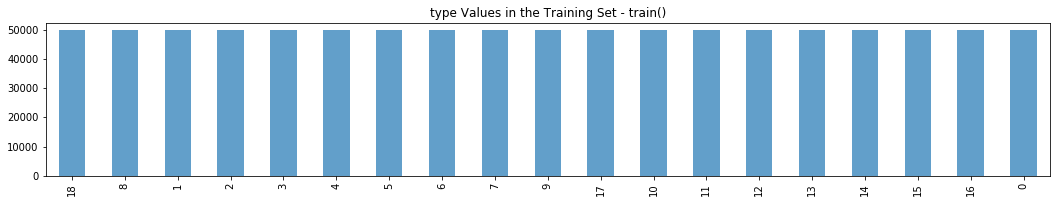

In [9]:
print(pd.DataFrame(X_train))
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
pd.DataFrame(y_train)[0].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [10]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,943920.000000,9.439200e+05,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000,943920.000000
mean,100896.891672,-2.318454e+00,-0.217673,-0.192792,-0.301997,-0.220781,-0.768492,-0.064719,0.049082,-0.215948,-0.178008,0.271755,0.019160,0.096793,-0.105693,-0.089680,0.268437,0.058564,-0.130903,-0.121189,-0.141857
std,57257.212979,2.180247e+03,60.639946,41.752031,42.633576,32.717315,801.413168,142.864391,22.076091,38.323733,37.537159,145.712504,38.077345,21.499123,35.734862,34.018527,27.630666,42.200949,42.908366,30.614495,31.636302
min,0.000000,-2.117774e+06,-16339.744058,-11029.366423,-11425.722863,-10129.148855,-777873.716137,-86915.744311,-8680.696066,-8331.910727,-10499.545334,-9601.988638,-8982.926052,-8052.432652,-13626.619779,-10019.242823,-9629.838573,-12785.353886,-12219.397613,-13033.426412,-8372.746487
25%,52067.756928,-4.281852e-01,-0.383840,-0.508910,-0.555775,-0.527292,-0.405488,-0.336151,-0.467200,-0.473813,-0.433384,-0.316280,-0.313576,-0.410973,-0.387705,-0.353386,-0.295190,-0.305500,-0.411978,-0.382862,-0.325419
50%,101654.480053,1.893580e-01,0.074243,0.042805,0.067179,-0.030403,0.207292,0.106576,0.066627,0.108063,0.037209,0.215754,0.144271,0.078605,0.105649,0.060029,0.268622,0.145725,0.080101,0.105947,0.073714
75%,150199.069615,9.881529e-01,0.846926,0.542877,0.457602,0.449111,0.995979,0.838514,0.537456,0.472449,0.459212,0.974932,0.721209,0.471749,0.435845,0.448361,1.086655,0.713922,0.472961,0.441398,0.458301
max,199990.000000,7.478071e+03,1436.000816,1227.902537,2069.872112,3989.069635,2022.746137,99860.116617,4799.382370,3311.908758,7259.900950,117163.206091,4190.996475,2346.392975,3285.157201,5789.200524,5306.131089,3657.592355,4095.212771,1351.832486,2377.503900


In [11]:
y_train.describe()


AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=0)

In [13]:
%%time
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(max_depth = 7,n_esetimators=100, n_jobs=-1, random_state=0)
XGB_clf.get_params()
XGB_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-merror:0.202185	validation_1-merror:0.205907
[1]	validation_0-merror:0.191551	validation_1-merror:0.195059
[2]	validation_0-merror:0.182682	validation_1-merror:0.186658
[3]	validation_0-merror:0.180696	validation_1-merror:0.185413
[4]	validation_0-merror:0.178164	validation_1-merror:0.183077
[5]	validation_0-merror:0.175447	validation_1-merror:0.180518
[6]	validation_0-merror:0.17371	validation_1-merror:0.178871
[7]	validation_0-merror:0.170985	validation_1-merror:0.176069
[8]	validation_0-merror:0.169367	validation_1-merror:0.17475
[9]	validation_0-merror:0.16778	validation_1-merror:0.173394
[10]	validation_0-merror:0.166673	validation_1-merror:0.172414
[11]	validation_0-merror:0.165209	validation_1-merror:0.171058
[12]	validation_0-merror:0.163529	validation_1-merror:0.169437
[13]	validation_0-merror:0.162277	validation_1-merror:0.16815
[14]	validation_0-merror:0.161227	validation_1-merror:0.167207
[15]	validation_0-merror:0.160309	validation_1-merror:0.166518
[16]	v

In [18]:
train.describe()


,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281,8.877339
std,57732.57318,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138,4.624156
min,0.00000,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196,0.000000
25%,49997.50000,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774,6.000000
50%,99995.00000,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997,8.000000
75%,149992.50000,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554,11.000000
max,199990.00000,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172,18.000000


In [19]:
XGB_pred = XGB_clf.predict_proba(test.values)
submission = pd.DataFrame(data=XGB_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('XGBClassifier5.csv', index=True)
submission.describe()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,0.025188,0.033821,0.005667,0.013627,0.068424,0.063512,0.177531,0.047717,0.191806,0.000755,0.064295,0.058805,0.001749,0.048744,0.019107,0.072456,0.007000,0.002287,0.097507
std,0.082219,0.170716,0.051135,0.100803,0.226518,0.198246,0.368778,0.145974,0.347243,0.023925,0.237249,0.121454,0.015060,0.149844,0.126818,0.244350,0.076095,0.006675,0.238474
min,0.000005,0.000004,0.000010,0.000014,0.000004,0.000004,0.000014,0.000020,0.000013,0.000003,0.000008,0.000018,0.000006,0.000015,0.000004,0.000004,0.000004,0.000006,0.000010
25%,0.000152,0.000068,0.000062,0.000059,0.000047,0.000082,0.000203,0.000651,0.001585,0.000042,0.000066,0.003945,0.000045,0.000164,0.000064,0.000049,0.000046,0.000131,0.000099
50%,0.000478,0.000214,0.000156,0.000147,0.000139,0.000240,0.000430,0.003540,0.006557,0.000119,0.000157,0.013892,0.000138,0.000454,0.000187,0.000140,0.000133,0.000425,0.000528
75%,0.009832,0.000890,0.000322,0.000306,0.000316,0.011367,0.002453,0.018064,0.132134,0.000211,0.000319,0.048634,0.000343,0.012681,0.000346,0.000288,0.000246,0.001997,0.009994
max,0.810402,0.994343,0.964111,0.988787,0.946145,0.963253,0.996567,0.991510,0.999692,0.999769,0.997586,0.956937,0.601303,0.990323,0.981463,0.984929,0.997557,0.205354,0.974807


In [16]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 19 columns):
STAR_WHITE_DWARF       10009 non-null float64
STAR_CATY_VAR          10009 non-null float64
STAR_BROWN_DWARF       10009 non-null float64
SERENDIPITY_RED        10009 non-null float64
REDDEN_STD             10009 non-null float64
STAR_BHB               10009 non-null float64
GALAXY                 10009 non-null float64
SERENDIPITY_DISTANT    10009 non-null float64
QSO                    10009 non-null float64
SKY                    10009 non-null float64
STAR_RED_DWARF         10009 non-null float64
ROSAT_D                10009 non-null float64
STAR_PN                10009 non-null float64
SERENDIPITY_FIRST      10009 non-null float64
STAR_CARBON            10009 non-null float64
SPECTROPHOTO_STD       10009 non-null float64
STAR_SUB_DWARF         10009 non-null float64
SERENDIPITY_MANUAL     10009 non-null float64
SERENDIPITY_BLUE       10009 non-null float64
dtypes: flo

In [17]:
pd.DataFrame(XGB_pred).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 19 columns):
0     10009 non-null float32
1     10009 non-null float32
2     10009 non-null float32
3     10009 non-null float32
4     10009 non-null float32
5     10009 non-null float32
6     10009 non-null float32
7     10009 non-null float32
8     10009 non-null float32
9     10009 non-null float32
10    10009 non-null float32
11    10009 non-null float32
12    10009 non-null float32
13    10009 non-null float32
14    10009 non-null float32
15    10009 non-null float32
16    10009 non-null float32
17    10009 non-null float32
18    10009 non-null float32
dtypes: float32(19)
memory usage: 743.0 KB
